## Evaluate particulate Mn model concentrations with observations 

Using 2015 Canadian GEOTRACES data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import modules.mapping_functions as mf

%matplotlib inline

Parameters:

In [2]:
obs_color   = '#e54141'
model_color = '#33c7ff'

Observations:

In [3]:
# Station information:
GEOTRACES = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = GEOTRACES['Station names'].dropna().astype('str')
Manuel_lons = GEOTRACES['station lon'].astype('float').dropna().values
Manuel_lats = GEOTRACES['Station lat'].astype('float').dropna().values

In [4]:
# Particulate Mn data:
p_data  = pd.read_csv('/ocean/brogalla/GEOTRACES/data/pTM_Maldonado_DATA_v2_notes.csv')
p_pMno  = p_data['Mn (pmol/L)']
p_pMn   = p_pMno[p_pMno != 'BD'].dropna().astype('float').values*1e-3 # pM --> nM
p_depth = p_data['CTDPRS (DBAR)'][p_pMno != 'BD'].astype('float').values
p_stns  = p_data['GEOTR_STN'][p_pMno != 'BD'].astype('str')

Model:

In [7]:
month = 7

r = nc.Dataset('/data/brogalla/run_storage/Mn-reference-202110/ANHA12_ref-2007_20211012/ANHA12_EXH006_2007_monthly.nc')
lon_model = np.array(r.variables['nav_lon'])[:,:]
lat_model = np.array(r.variables['nav_lat'])[:,:]
dmn_2015  = np.array(r.variables['dissolmn'])[month,0,:,:,:]
omn_2015  = np.array(r.variables['oxidismn'])[month,0,:,:,:]
deptht    = np.array(r.variables['deptht'])

Functions:

In [8]:
def plot_particulates(name, ax, model_depth, model_omn, obs_depth, obs_pMn, ylim=(100,0)): 
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_xlim(0, 5)
    ax.set_xticks([0,1,2,3,4,5])
    ax.set_xticklabels([0,'',2,'',4])
    ax.plot(model_omn*1e9, model_depth, c=model_color, label='Model')
    ax.plot(obs_pMn, obs_depth, c=obs_color, markersize=7, marker='.', markeredgecolor='k', label='Observations')
    
    try:
        ax.set_ylim(ylim[0],ylim[1])
        ax.text(2.3, ylim[0]*0.1, name, fontsize=7)
    except:
        print('empty obs depth array')
        
    ax.tick_params(axis='both', labelsize=7)
    
    if name=='CAA1':
        ax.legend(fontsize=7, loc=(0.2, 1.2), frameon=False)
        
    return

### Plot:

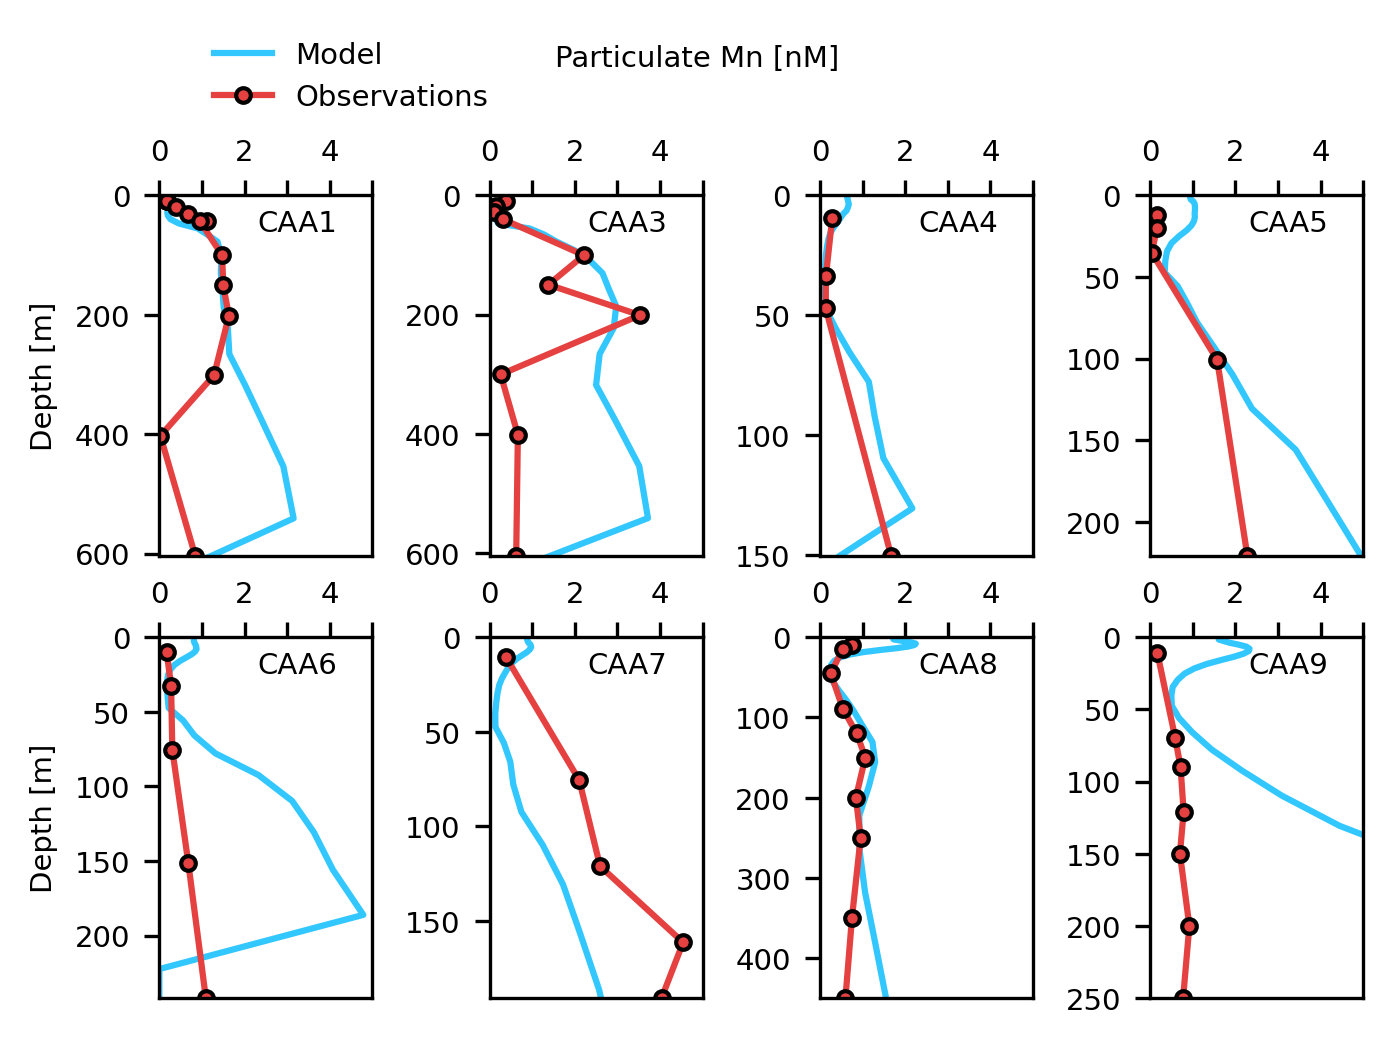

In [9]:
stn_list = ['CAA1','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9']

fig, ax = plt.subplots(2,4,figsize=(4.5, 3.7*0.9), dpi=300)
for n, stn in enumerate(stn_list):
    i, j = mf.find_indeces_vector(Manuel_lons[stn_names==stn], Manuel_lats[stn_names==stn], lon_model, lat_model)
    
    if n < 4:     
        plot_particulates(stn, ax[0,n], deptht, omn_2015[:,int(i),int(j)], \
                          p_depth[p_stns==stn], p_pMn[p_stns==stn], \
                          ylim=(np.amax(p_depth[p_stns==stn]),0))
    else:     
        plot_particulates(stn, ax[1,n-4], deptht, omn_2015[:,int(i),int(j)], \
                          p_depth[p_stns==stn], p_pMn[p_stns==stn], \
                          ylim=(np.amax(p_depth[p_stns==stn]),0))
        
fig.suptitle('Particulate Mn [nM]', fontsize=7)
    
ax[0,0].set_ylabel('Depth [m]', fontsize=7)
ax[1,0].set_ylabel('Depth [m]', fontsize=7)
plt.tight_layout(pad=0.2, w_pad=-2, h_pad=0.2)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/S8-pmn-evaluation.png', \
               bbox_inches='tight', dpi=300)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/S8-pmn-evaluation.svg', \
               format='svg', bbox_inches='tight', dpi=300)